### 230326 하은서 필수과제1

- 위에 나온 method 보간법 
- 다양한 보간법을 최소 7개 이상
- 필수 1. 개념 설명 위에 나온 방법이 어떤 방법인지?
- 필수 2. 실제 위에 에볼라 데이터를 이용한 코드 작성하고 우리가 했던 모든 보간법에 비교를 진행해 주세요.
- 시각화, 평균 확인 

In [1]:
import pandas as pd
ebola = pd.read_csv('country_timeseries.csv')
ebola

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
ebola.interpolate(method = 'quadratic').iloc[0:10, 0:5]['Cases_Liberia'].mean()  # 평균 확인

8025.584342975371

- 'Cases_Liberia' 평균은 약 8026

<Axes: >

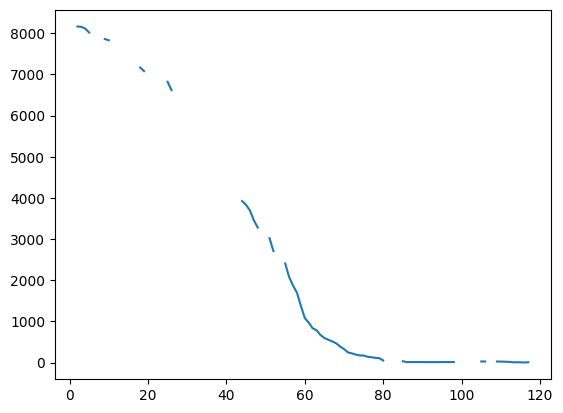

In [20]:
ebola['Cases_Liberia'].plot()  #NAN 값을 확인할 수 있음

### 1. 선형 보간법 (linear interpolate)

- 1차원 직선상에서 두 점의 값이 주어졌을 때, 그 사이의 값을 추정하기 위해 직선거리에 따라 선형적으로 계산(비례식)하는 방법

<Axes: >

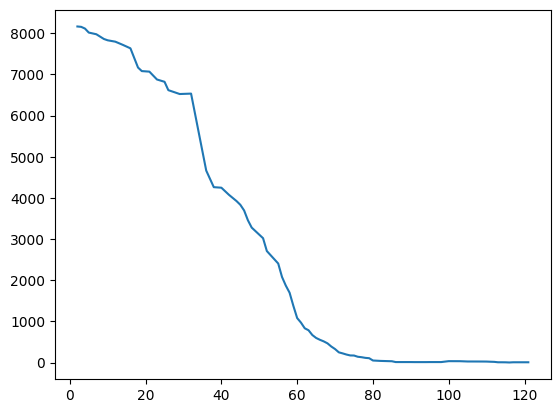

In [12]:
ebola.interpolate(method = 'linear')['Cases_Liberia'].plot()

In [22]:
ebola.interpolate(method = 'linear').iloc[0:10, 0:5]['Cases_Liberia'].mean() 

8026.5

In [53]:
ebola.interpolate(method = 'linear').iloc[0:10, 0:5]['Cases_Liberia']

0       NaN
1       NaN
2    8166.0
3    8157.0
4    8115.0
5    8018.0
6    7997.5
7    7977.0
8    7919.5
9    7862.0
Name: Cases_Liberia, dtype: float64

### 2. spline 보간법 (spline interpolate)

- 주어진 두 지점을 지나는 매끄러운 곡선을 찾아 결측값을 보간

<Axes: >

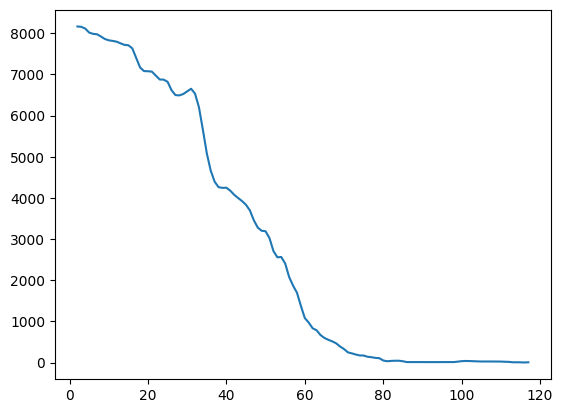

In [16]:
ebola.interpolate(method='quadratic')['Cases_Liberia'].plot()

In [23]:
ebola.interpolate(method='quadratic').iloc[0:10, 0:5]['Cases_Liberia'].mean() 

8025.584342975371

In [54]:
ebola.interpolate(method='quadratic').iloc[0:10, 0:5]['Cases_Liberia']

0            NaN
1            NaN
2    8166.000000
3    8157.000000
4    8115.000000
5    8018.000000
6    7986.797701
7    7977.000000
8    7922.877042
9    7862.000000
Name: Cases_Liberia, dtype: float64

### 2. limit 보간법 (limit interpolate)

- 연속적으로 결측값을 보간하는 개수 사용해서 제한하는 방법

<Axes: >

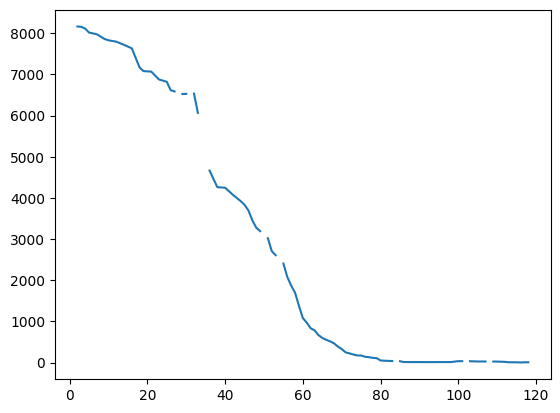

In [29]:
ebola.interpolate(method='values', limit=1)['Cases_Liberia'].plot()

<Axes: >

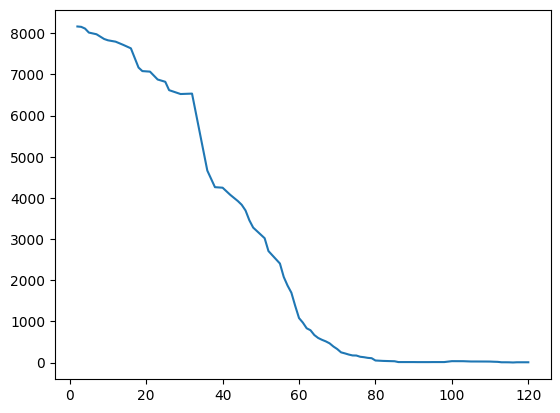

In [30]:
ebola.interpolate(method='values', limit=3)['Cases_Liberia'].plot()

In [35]:
ebola.interpolate(method='values', limit=1).iloc[0:10, 0:5]['Cases_Liberia'].mean()

8026.5

### 3. index 보간법 (index interpolate)

- 주어진 데이터 포인트들의 사이에서 새로운 데이터를 추정하는 방법

<Axes: >

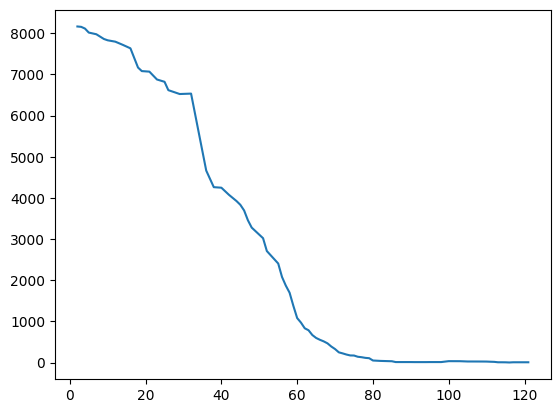

In [33]:
ebola.interpolate(method='index')['Cases_Liberia'].plot()

In [34]:
ebola.interpolate(method='index').iloc[0:10, 0:5]['Cases_Liberia'].mean()

8026.5

In [39]:
ebola.interpolate(method='index').iloc[0:10, 0:5]['Cases_Liberia']

0       NaN
1       NaN
2    8166.0
3    8157.0
4    8115.0
5    8018.0
6    7997.5
7    7977.0
8    7919.5
9    7862.0
Name: Cases_Liberia, dtype: float64

### 4. nearest 보간법 (nearest interpolate)

- 가장 근접한 이웃 픽셀의 값을 가져와 빈칸을 채우는 방식

<Axes: >

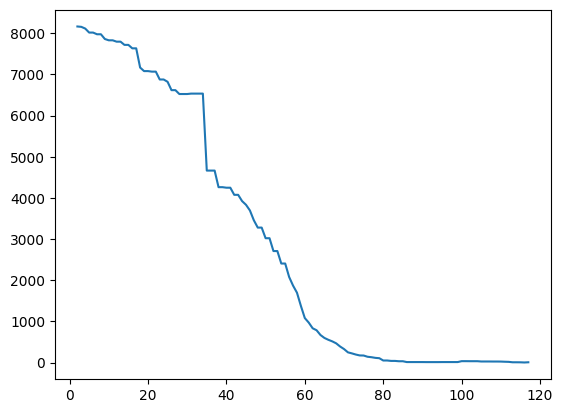

In [36]:
ebola.interpolate(method='nearest')['Cases_Liberia'].plot()

In [37]:
ebola.interpolate(method='nearest').iloc[0:10, 0:5]['Cases_Liberia'].mean()

8036.25

In [38]:
ebola.interpolate(method='nearest').iloc[0:10, 0:5]['Cases_Liberia']

0       NaN
1       NaN
2    8166.0
3    8157.0
4    8115.0
5    8018.0
6    8018.0
7    7977.0
8    7977.0
9    7862.0
Name: Cases_Liberia, dtype: float64

### 5.  삼차 보간법 (cubic interpolate)

<Axes: >

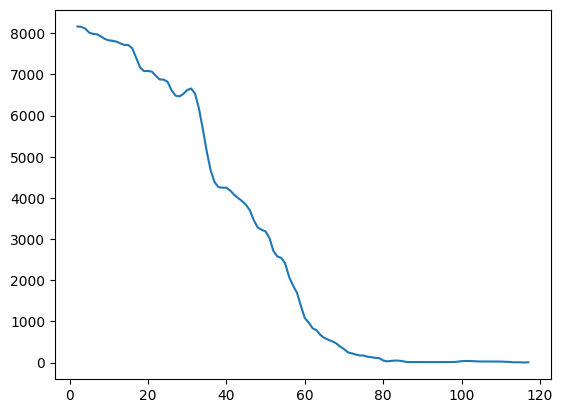

In [40]:
ebola.interpolate(method='cubic')['Cases_Liberia'].plot()

In [41]:
ebola.interpolate(method='cubic').iloc[0:10, 0:5]['Cases_Liberia'].mean()

8025.715404877655

In [42]:
ebola.interpolate(method='cubic').iloc[0:10, 0:5]['Cases_Liberia']

0            NaN
1            NaN
2    8166.000000
3    8157.000000
4    8115.000000
5    8018.000000
6    7985.410900
7    7977.000000
8    7925.312339
9    7862.000000
Name: Cases_Liberia, dtype: float64

### 6. zero 보간법 (zero interpolate)

<Axes: >

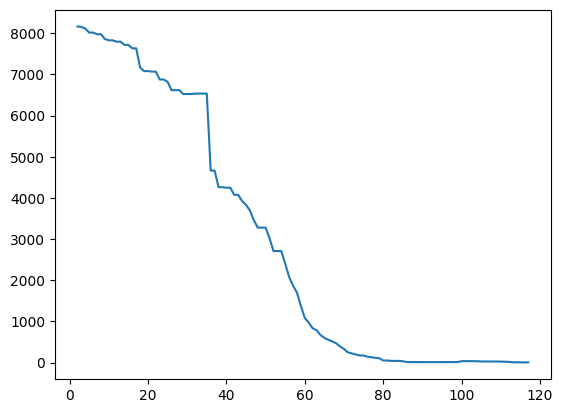

In [47]:
ebola.interpolate(method='zero')['Cases_Liberia'].plot()

In [50]:
ebola.interpolate(method='zero').iloc[0:10, 0:5]['Cases_Liberia'].mean()

8036.25

In [52]:
ebola.interpolate(method='zero').iloc[0:10, 0:5]['Cases_Liberia']

0       NaN
1       NaN
2    8166.0
3    8157.0
4    8115.0
5    8018.0
6    8018.0
7    7977.0
8    7977.0
9    7862.0
Name: Cases_Liberia, dtype: float64

### 7. pchip 보간법 (pchip interpolate)

<Axes: >

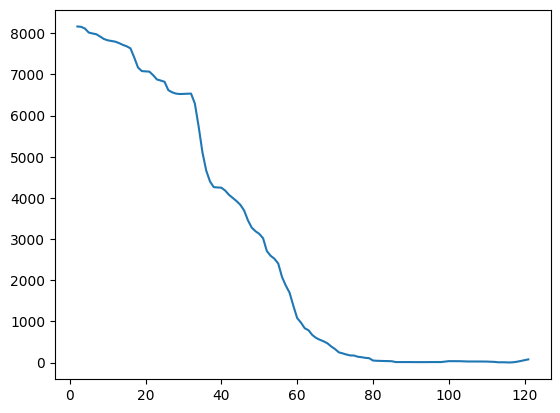

In [59]:
ebola.interpolate(method='pchip')['Cases_Liberia'].plot()

In [61]:
ebola.interpolate(method='pchip').iloc[0:10, 0:5]['Cases_Liberia'].mean()

8026.605292410492

In [60]:
ebola.interpolate(method='pchip').iloc[0:10, 0:5]['Cases_Liberia']

0            NaN
1            NaN
2    8166.000000
3    8157.000000
4    8115.000000
5    8018.000000
6    7995.934530
7    7977.000000
8    7921.907809
9    7862.000000
Name: Cases_Liberia, dtype: float64